<a href="https://colab.research.google.com/github/SuzanaKstro/Passo-a-passo/blob/main/Challenger03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")


In [ ]:
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df


In [ ]:
def remover_colunas(df):
    colunas_para_manter = [
        "teve_febre",
        "teve_tosse",
        "teve_garganta",
        "teve_dif_respirar",
        "teve_perda_olfato_paladar",
        "medida_contato",
        "ficou_internado",
        "nr_idade",
        "nm_sexo",
        "nm_raca",
        "procurou_Unidade_saude",
        "fez_teste_covid",
        "tipo_area",
        "itens_higiene",
        "recebeu_auxilio_emergencial",
        "solicitou_emprestimo",
        "nm_escolaridade",
        "ocupacao_princial",
        "esta_empregado",
        "id_uf",
        "positivo_swab",
        "positivo_furo",
        "positivo_braco"
    ]
    df_reduzido = df.select(*colunas_para_manter)
    return df_reduzido


In [ ]:
df_reduzido.show()

+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+-----------------+--------------+-----+-------------+-------------+--------------+
|teve_febre|teve_tosse|teve_garganta|teve_dif_respirar|teve_perda_olfato_paladar|medida_contato|ficou_internado|nr_idade|nm_sexo|nm_raca|procurou_Unidade_saude|fez_teste_covid|tipo_area|itens_higiene|recebeu_auxilio_emergencial|solicitou_emprestimo|nm_escolaridade|ocupacao_princial|esta_empregado|id_uf|positivo_swab|positivo_furo|positivo_braco|
+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+-----------------+--------------+-----+

In [ ]:
spark = SparkSession.builder.appName("desafio").getOrCreate()

In [ ]:
df_set = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_092020.csv")


In [ ]:

df_out = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_102020.csv")

In [ ]:
df_nov = spark.read \
     .option("header", "true") \
     .option("inferSchema", "true") \
     .csv("/content/PNAD_COVID_112020.csv")

In [ ]:
df_set_renomeado = renomear_colunas(df_set)

In [ ]:
df_out_renomeado = renomear_colunas(df_out)

In [ ]:
df_nov_renomeado = renomear_colunas(df_nov)

In [ ]:
for col in colunas_para_manter:
    if col not in df_set_renomeado.columns:
        print(f"Coluna ausente: {col}")

Coluna ausente: diabetes
Coluna ausente: hipertensao
Coluna ausente: doenca_pulmonar
Coluna ausente: doenca_coracao
Coluna ausente: depressao
Coluna ausente: cancer


In [ ]:
df_set_reduzido = remover_colunas(df_set_renomeado)

In [ ]:
df_out_reduzido = remover_colunas(df_out_renomeado)

In [ ]:
df_nov_reduzido = remover_colunas(df_nov_renomeado)

In [ ]:
df_unido = df_set_reduzido.union(df_out_reduzido).union(df_nov_reduzido)

In [ ]:
df_unido_positivos = df_unido.filter((F.col("positivo_swab") == 1) | (F.col("positivo_furo") == 1) | (F.col("positivo_braco") == 1))

In [ ]:
df_unido_positivos.count()

32922

In [ ]:
df_procura_ativa_1 = df_unido.filter(
    (F.col("teve_febre") == 1) &
    (F.col("teve_tosse") == 1) &
    (F.col("teve_garganta") == 1) &
    (F.col("teve_dif_respirar") == 1) &
    (F.col("teve_perda_olfato_paladar") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_1.count()

672

In [ ]:
df_procura_ativa_2 = df_unido.filter(
    (F.col("teve_febre") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_2.count()

4909

In [ ]:
df_procura_ativa_3 = df_unido.filter(
    (F.col("teve_tosse") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_3.count()

5488

In [ ]:
df_procura_ativa_4 = df_unido.filter(
    (F.col("teve_garganta") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_4.count()

4828

In [ ]:
df_procura_ativa_5 = df_unido.filter(
    (F.col("teve_dif_respirar") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_5.count()

2574

In [ ]:
df_procura_ativa_6 = df_unido.filter(

    (F.col("teve_perda_olfato_paladar") == 1) &
    (F.col("procurou_Unidade_saude") == 1))

In [ ]:
df_procura_ativa_6.count()

2574

In [ ]:
df_procura_ativa = df_unido.filter(
    (F.col("teve_febre") == 1) &
    (F.col("teve_tosse") == 1) &
    (F.col("teve_garganta") == 1) &
    (F.col("teve_dif_respirar") == 1) &
    (F.col("teve_perda_olfato_paladar") == 1) &
    (F.col("procurou_Unidade_saude") == 2))

In [ ]:
df_procura_ativa.count()

200

In [ ]:
from pyspark.sql import functions as F

In [ ]:
df_positivos_por_escolaridade = df_unido_positivos.groupBy("nm_escolaridade").count()
df_positivos_por_escolaridade.show()

+---------------+-----+
|nm_escolaridade|count|
+---------------+-----+
|              1| 1548|
|              6| 2787|
|              3| 1957|
|              5| 9659|
|              4| 2637|
|              8| 1845|
|              7| 5895|
|              2| 6594|
+---------------+-----+



In [ ]:
df_escolaridade = df_positivos_por_escolaridade.withColumn(
    "nm_escolaridade",
    F.when(F.col("nm_escolaridade") == 1, "Sem instrução")
    .when(F.col("nm_escolaridade") == 2, "Fundamental incompleto")
    .when(F.col("nm_escolaridade") == 3, "Fundamental completo")
    .when(F.col("nm_escolaridade") == 4, "Médio incompleto")
    .when(F.col("nm_escolaridade") == 5, "Médio completo")
    .when(F.col("nm_escolaridade") == 6, "Superior incompleto")
    .when(F.col("nm_escolaridade") == 7, "Superior completo")
    .when(F.col("nm_escolaridade") == 8, "Pós-graduação")
    .otherwise("Desconhecido"))

In [ ]:
df_escolaridade.show()

+--------------------+-----+
|     nm_escolaridade|count|
+--------------------+-----+
|       Sem instrução| 1548|
| Superior incompleto| 2787|
|Fundamental completo| 1957|
|      Médio completo| 9659|
|    Médio incompleto| 2637|
|       Pós-graduação| 1845|
|   Superior completo| 5895|
|Fundamental incom...| 6594|
+--------------------+-----+



In [ ]:
from pyspark.sql import functions as F


total_entrevistados_por_escolaridade = df_unido.groupBy("nm_escolaridade").count()


total_entrevistados_por_escolaridade = total_entrevistados_por_escolaridade.withColumn(
    "nm_escolaridade",
    F.when(F.col("nm_escolaridade") == 1, "Sem instrução")
    .when(F.col("nm_escolaridade") == 2, "Fundamental incompleto")
    .when(F.col("nm_escolaridade") == 3, "Fundamental completo")
    .when(F.col("nm_escolaridade") == 4, "Médio incompleto")
    .when(F.col("nm_escolaridade") == 5, "Médio completo")
    .when(F.col("nm_escolaridade") == 6, "Superior incompleto")
    .when(F.col("nm_escolaridade") == 7, "Superior completo")
    .when(F.col("nm_escolaridade") == 8, "Pós-graduação")
    .otherwise("Desconhecido"))


total_entrevistados_por_escolaridade.show()


+--------------------+------+
|     nm_escolaridade| count|
+--------------------+------+
|       Sem instrução|124035|
| Superior incompleto| 59678|
|Fundamental completo| 76092|
|      Médio completo|256040|
|    Médio incompleto|107635|
|       Pós-graduação| 30290|
|   Superior completo|107441|
|Fundamental incom...|387986|
+--------------------+------+



In [ ]:
df_procura_ativa = df_unido.filter(F.col("procurou_Unidade_saude") == 2)


df_procura_escolaridade = df_procura_ativa.groupBy("nm_escolaridade").count()

df_procura_escolaridade.show()


+---------------+-----+
|nm_escolaridade|count|
+---------------+-----+
|              1| 3159|
|              6| 1936|
|              3| 2228|
|              5| 7344|
|              4| 2867|
|              8| 1234|
|              7| 3269|
|              2|11104|
+---------------+-----+



In [ ]:
df_unido_positivos_area = df_unido.filter(
    ((F.col("positivo_swab") == 1) |
     (F.col("positivo_furo") == 1) |
     (F.col("positivo_braco") == 1)) &
    (F.col("tipo_area").isNotNull())  # Adicione um filtro específico para o tipo de área se necessário
)

# Mostrar o resultado
df_unido_positivos_area.show()

+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+-----------------+--------------+-----+-------------+-------------+--------------+
|teve_febre|teve_tosse|teve_garganta|teve_dif_respirar|teve_perda_olfato_paladar|medida_contato|ficou_internado|nr_idade|nm_sexo|nm_raca|procurou_Unidade_saude|fez_teste_covid|tipo_area|itens_higiene|recebeu_auxilio_emergencial|solicitou_emprestimo|nm_escolaridade|ocupacao_princial|esta_empregado|id_uf|positivo_swab|positivo_furo|positivo_braco|
+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+-----------------+--------------+-----+

In [ ]:
from pyspark.sql import functions as F

# Filtrar os casos positivos e também pelo tipo de área (tipo_area)
df_unido_positivos_area = df_unido.filter(
    ((F.col("positivo_swab") == 1) |
     (F.col("positivo_furo") == 1) |
     (F.col("positivo_braco") == 1)) &
    (F.col("tipo_area").isNotNull())
)

# Agrupar pelo tipo de área e contar o número de positivos em cada tipo
df_total_positivos_area = df_unido_positivos_area.groupBy("tipo_area").count()

# Mostrar o resultado
df_total_positivos_area = df_total_positivos_area.withColumn(
    "descricao_tipo_area",
    F.when(F.col("tipo_area") == 1, "Capital")
    .when(F.col("tipo_area") == 2, "Região Metropolitana")
    .when(F.col("tipo_area") == 3, "Região de Desenvolvimento")
    .when(F.col("tipo_area") == 4, "Resto da UF")
    .otherwise("Desconhecido")
)

# Mostrar o resultado
df_total_positivos_area.select ("descricao_tipo_area", "count").show(truncate=False)

+-------------------------+-----+
|descricao_tipo_area      |count|
+-------------------------+-----+
|Capital                  |10869|
|Região de Desenvolvimento|567  |
|Resto da UF              |17432|
|Região Metropolitana     |4054 |
+-------------------------+-----+



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_total_positivos_area_pd = df_total_positivos_area.toPandas()

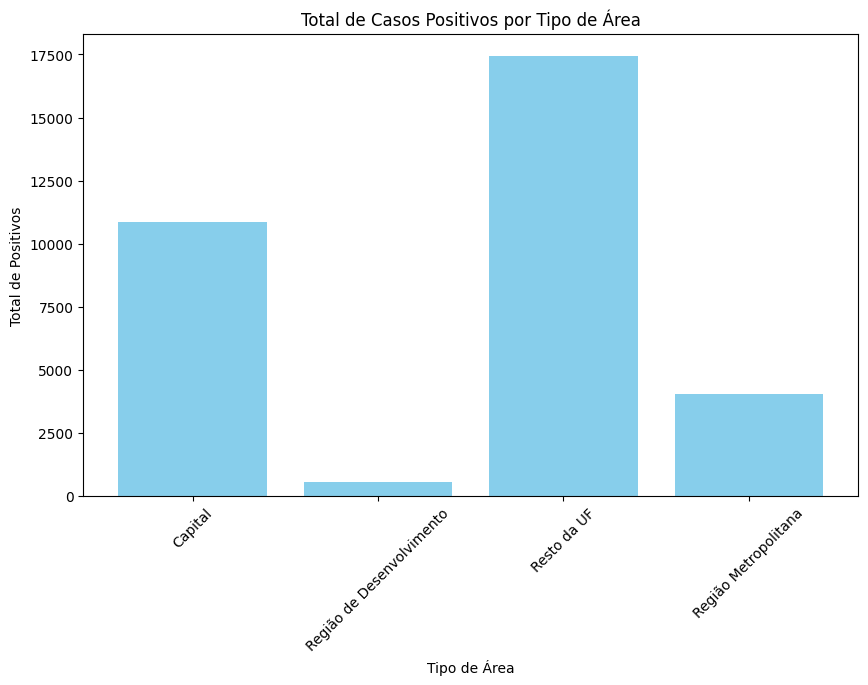

In [ ]:

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_total_positivos_area_pd["descricao_tipo_area"], df_total_positivos_area_pd["count"], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title("Total de Casos Positivos por Tipo de Área")
plt.xlabel("Tipo de Área")
plt.ylabel("Total de Positivos")

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [ ]:
dados_estados = [
    (11, "Rondônia"), (12, "Acre"), (13, "Amazonas"), (14, "Roraima"), (15, "Pará"),
    (16, "Amapá"), (17, "Tocantins"), (21, "Maranhão"), (22, "Piauí"), (23, "Ceará"),
    (24, "Rio Grande do Norte"), (25, "Paraíba"), (26, "Pernambuco"), (27, "Alagoas"),
    (28, "Sergipe"), (29, "Bahia"), (31, "Minas Gerais"), (32, "Espírito Santo"),
    (33, "Rio de Janeiro"), (35, "São Paulo"), (41, "Paraná"), (42, "Santa Catarina"),
    (43, "Rio Grande do Sul"), (50, "Mato Grosso do Sul"), (51, "Mato Grosso"),
    (52, "Goiás"), (53, "Distrito Federal")
]

In [ ]:
# Juntar o DataFrame df_unido_positivos com o DataFrame df_estados para adicionar os nomes dos estados
df_unido_positivos_estados = df_unido_positivos.join(df_estados, on="id_uf", how="left")

# Mostrar o resultado
df_unido_positivos_estados.show(truncate=False)


+-----+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+-----------------+--------------+-------------+-------------+--------------+-----------+
|id_uf|teve_febre|teve_tosse|teve_garganta|teve_dif_respirar|teve_perda_olfato_paladar|medida_contato|ficou_internado|nr_idade|nm_sexo|nm_raca|procurou_Unidade_saude|fez_teste_covid|tipo_area|itens_higiene|recebeu_auxilio_emergencial|solicitou_emprestimo|nm_escolaridade|ocupacao_princial|esta_empregado|positivo_swab|positivo_furo|positivo_braco|nome_estado|
+-----+----------+----------+-------------+-----------------+-------------------------+--------------+---------------+--------+-------+-------+----------------------+---------------+---------+-------------+---------------------------+--------------------+---------------+---------

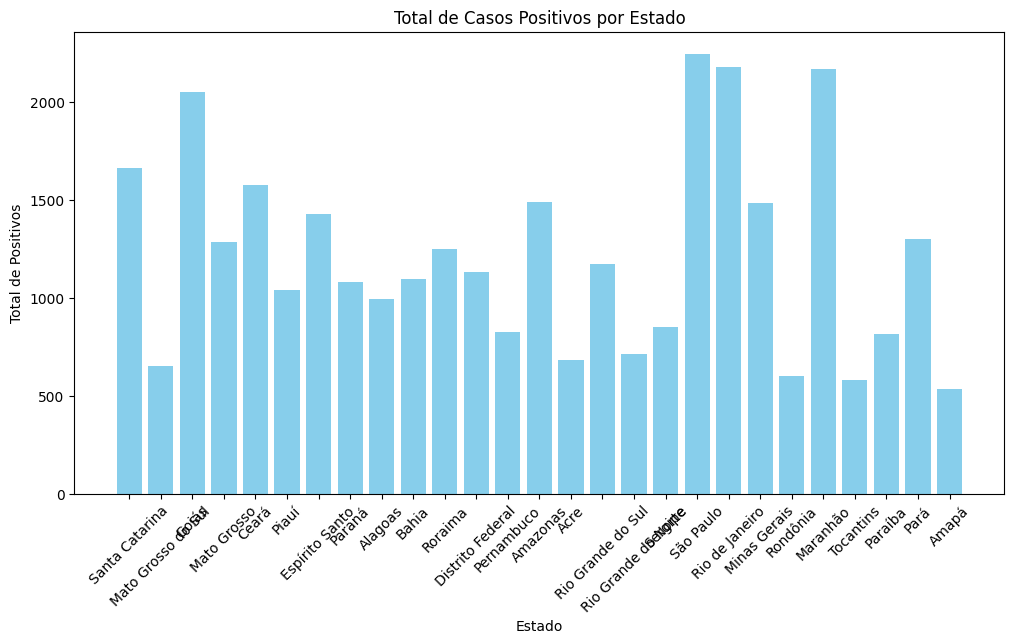

In [ ]:
# Agrupar pelo nome do estado (nome_estado) e contar o número de positivos em cada estado
df_total_positivos_estado = df_unido_positivos_estados.groupBy("nome_estado").count()

# Converter o DataFrame do PySpark para Pandas
df_total_positivos_estado_pd = df_total_positivos_estado.toPandas()

# Importar a biblioteca de gráficos
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_total_positivos_estado_pd["nome_estado"], df_total_positivos_estado_pd["count"], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title("Total de Casos Positivos por Estado")
plt.xlabel("Estado")
plt.ylabel("Total de Positivos")

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

<ipython-input-151-2e3bcb6df9c0>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="count", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")


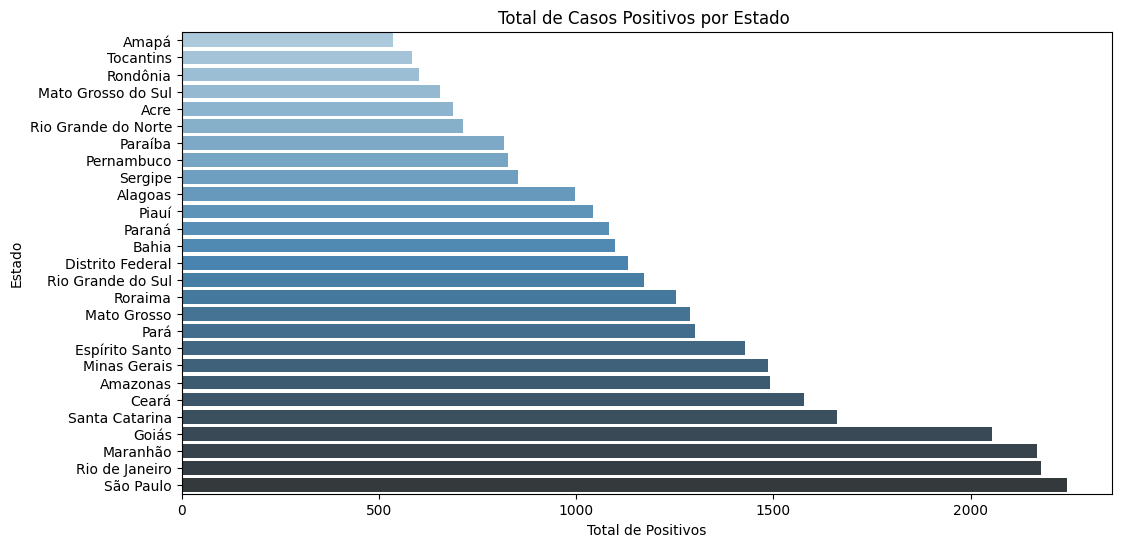

In [ ]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os casos positivos
df_unido_positivos = df_unido.filter(
    (F.col("positivo_swab") == 1) |
    (F.col("positivo_furo") == 1) |
    (F.col("positivo_braco") == 1)
)

# Dados dos estados com id_uf e nome do estado
dados_estados = [
    (11, "Rondônia"), (12, "Acre"), (13, "Amazonas"), (14, "Roraima"), (15, "Pará"),
    (16, "Amapá"), (17, "Tocantins"), (21, "Maranhão"), (22, "Piauí"), (23, "Ceará"),
    (24, "Rio Grande do Norte"), (25, "Paraíba"), (26, "Pernambuco"), (27, "Alagoas"),
    (28, "Sergipe"), (29, "Bahia"), (31, "Minas Gerais"), (32, "Espírito Santo"),
    (33, "Rio de Janeiro"), (35, "São Paulo"), (41, "Paraná"), (42, "Santa Catarina"),
    (43, "Rio Grande do Sul"), (50, "Mato Grosso do Sul"), (51, "Mato Grosso"),
    (52, "Goiás"), (53, "Distrito Federal")
]

# Criar um DataFrame a partir dos dados dos estados
schema_estados = ["id_uf", "nome_estado"]
df_estados = spark.createDataFrame(dados_estados, schema=schema_estados)

# Juntar o DataFrame df_unido_positivos com o DataFrame df_estados para adicionar os nomes dos estados
df_unido_positivos_estados = df_unido_positivos.join(df_estados, on="id_uf", how="left")

# Agrupar pelo nome do estado (nome_estado) e contar o número de positivos em cada estado
df_total_positivos_estado = df_unido_positivos_estados.groupBy("nome_estado").count()

# Converter o DataFrame do PySpark para Pandas
df_total_positivos_estado_pd = df_total_positivos_estado.toPandas()

# Ordenar os dados em ordem crescente
df_total_positivos_estado_pd = df_total_positivos_estado_pd.sort_values(by="count", ascending=True)

# Criar o gráfico de barras com cores ascendentes
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x="count", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Casos Positivos por Estado ")
plt.xlabel("Total de Positivos")
plt.ylabel("Estado")

# Exibir o gráfico
plt.show()


In [ ]:
schema_estados = ["id_uf", "nome_estado"]
df_estados = spark.createDataFrame(dados_estados, schema=schema_estados)

In [ ]:
df_unido_positivos = df_unido.filter(
    (F.col("positivo_swab") == 1) |
    (F.col("positivo_furo") == 1) |
    (F.col("positivo_braco") == 1)
)

# Agrupar pelo estado (id_uf) e contar o número de positivos em cada estado
df_total_positivos_estado = df_unido_positivos.groupBy("id_uf").count()

# Mostrar o resultado
df_total_positivos_estado.show(truncate=False)

+-----+-----+
|id_uf|count|
+-----+-----+
|31   |1487 |
|28   |853  |
|26   |826  |
|27   |997  |
|12   |687  |
|22   |1042 |
|13   |1491 |
|16   |535  |
|15   |1301 |
|17   |583  |
|23   |1578 |
|25   |816  |
|24   |714  |
|29   |1098 |
|21   |2168 |
|32   |1427 |
|11   |601  |
|14   |1252 |
|53   |1131 |
|52   |2053 |
+-----+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df_unido.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Selecionar as colunas de interesse, incluindo a idade
df_idades_sintomas_unidade_saude = df_sintomas_unidade_saude.select("nr_idade", "teve_garganta", "teve_dif_respirar", "teve_perda_olfato_paladar", "teve_tosse", "procurou_Unidade_saude")

# Mostrar o resultado
df_idades_sintomas_unidade_saude.show(truncate=False)


+--------+-------------+-----------------+-------------------------+----------+----------------------+
|nr_idade|teve_garganta|teve_dif_respirar|teve_perda_olfato_paladar|teve_tosse|procurou_Unidade_saude|
+--------+-------------+-----------------+-------------------------+----------+----------------------+
|31      |1            |2                |2                        |2         |1                     |
|87      |2            |1                |2                        |1         |1                     |
|38      |1            |1                |2                        |1         |1                     |
|62      |1            |1                |1                        |1         |1                     |
|36      |1            |1                |1                        |1         |1                     |
|24      |2            |1                |2                        |2         |1                     |
|40      |2            |2                |1                        |2    

In [ ]:
from pyspark.sql import functions as F

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df_unido.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Selecionar as colunas de interesse, incluindo a idade
df_idades_sintomas_unidade_saude = df_sintomas_unidade_saude.select("nr_idade", "teve_garganta", "teve_dif_respirar", "teve_perda_olfato_paladar", "teve_tosse", "procurou_Unidade_saude")

# Mostrar o DataFrame resultante
df_idades_sintomas_unidade_saude.show(truncate=False)

# Calcular o total de pessoas que tiveram pelo menos um dos sintomas e procuraram unidade de saúde
total_pessoas = df_idades_sintomas_unidade_saude.count()

# Mostrar o total
print(f"Total de pessoas que tiveram pelo menos um dos sintomas e procuraram unidade de saúde: {total_pessoas}")


+--------+-------------+-----------------+-------------------------+----------+----------------------+
|nr_idade|teve_garganta|teve_dif_respirar|teve_perda_olfato_paladar|teve_tosse|procurou_Unidade_saude|
+--------+-------------+-----------------+-------------------------+----------+----------------------+
|31      |1            |2                |2                        |2         |1                     |
|87      |2            |1                |2                        |1         |1                     |
|38      |1            |1                |2                        |1         |1                     |
|62      |1            |1                |1                        |1         |1                     |
|36      |1            |1                |1                        |1         |1                     |
|24      |2            |1                |2                        |2         |1                     |
|40      |2            |2                |1                        |2    

<ipython-input-154-3d2d195372eb>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_faixa_etaria.index, y=df_faixa_etaria.values, palette="Blues_d")


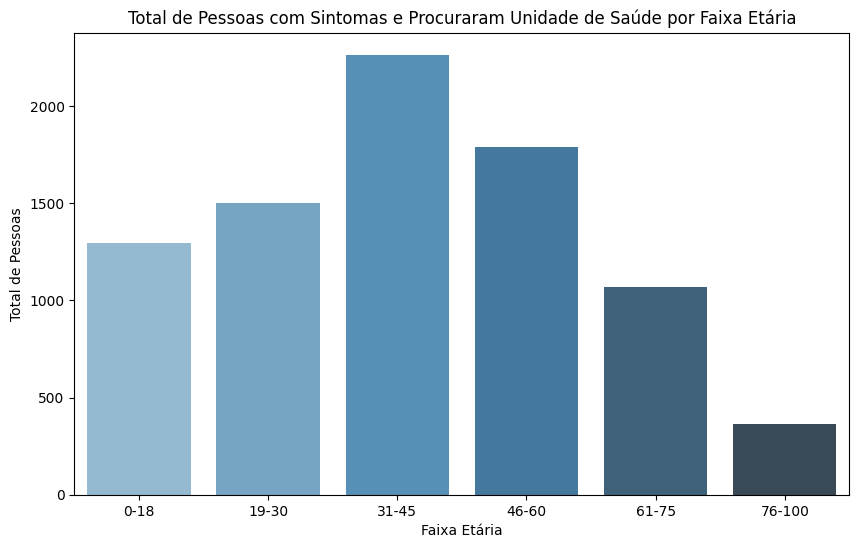

In [ ]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df_unido.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Selecionar as colunas de interesse, incluindo a idade
df_idades_sintomas_unidade_saude = df_sintomas_unidade_saude.select("nr_idade", "teve_garganta", "teve_dif_respirar", "teve_perda_olfato_paladar", "teve_tosse", "procurou_Unidade_saude")

# Converter o DataFrame do PySpark para Pandas
df_idades_sintomas_unidade_saude_pd = df_idades_sintomas_unidade_saude.toPandas()

# Criar faixas etárias
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
df_idades_sintomas_unidade_saude_pd['faixa_etaria'] = pd.cut(df_idades_sintomas_unidade_saude_pd['nr_idade'], bins=bins, labels=labels, right=False)

# Contar o número de pessoas em cada faixa etária
df_faixa_etaria = df_idades_sintomas_unidade_saude_pd['faixa_etaria'].value_counts().sort_index()

# Criar o gráfico de barras com cores ascendentes
plt.figure(figsize=(10, 6))
sns.barplot(x=df_faixa_etaria.index, y=df_faixa_etaria.values, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Pessoas com Sintomas e Procuraram Unidade de Saúde por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Total de Pessoas")

# Exibir o gráfico
plt.show()


<ipython-input-155-12a52c83cffe>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_faixa_etaria_porcentagem.index, y=df_faixa_etaria_porcentagem.values, palette="Blues_d")


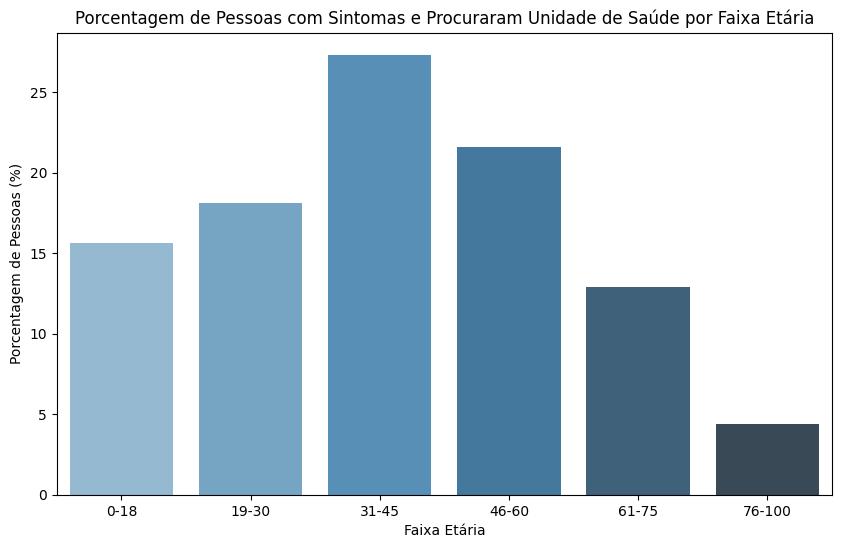

In [ ]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df_unido.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Selecionar as colunas de interesse, incluindo a idade
df_idades_sintomas_unidade_saude = df_sintomas_unidade_saude.select("nr_idade", "teve_garganta", "teve_dif_respirar", "teve_perda_olfato_paladar", "teve_tosse", "procurou_Unidade_saude")

# Converter o DataFrame do PySpark para Pandas
df_idades_sintomas_unidade_saude_pd = df_idades_sintomas_unidade_saude.toPandas()

# Criar faixas etárias
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
df_idades_sintomas_unidade_saude_pd['faixa_etaria'] = pd.cut(df_idades_sintomas_unidade_saude_pd['nr_idade'], bins=bins, labels=labels, right=False)

# Contar o número de pessoas em cada faixa etária
df_faixa_etaria = df_idades_sintomas_unidade_saude_pd['faixa_etaria'].value_counts().sort_index()

# Calcular o total de pessoas
total_pessoas = df_idades_sintomas_unidade_saude_pd.shape[0]

# Calcular a porcentagem de pessoas em cada faixa etária
df_faixa_etaria_porcentagem = (df_faixa_etaria / total_pessoas) * 100

# Criar o gráfico de barras com porcentagens
plt.figure(figsize=(10, 6))
sns.barplot(x=df_faixa_etaria_porcentagem.index, y=df_faixa_etaria_porcentagem.values, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Porcentagem de Pessoas com Sintomas e Procuraram Unidade de Saúde por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Porcentagem de Pessoas (%)")

# Exibir o gráfico
plt.show()


<ipython-input-157-76575b0d7f5d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="percent", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")


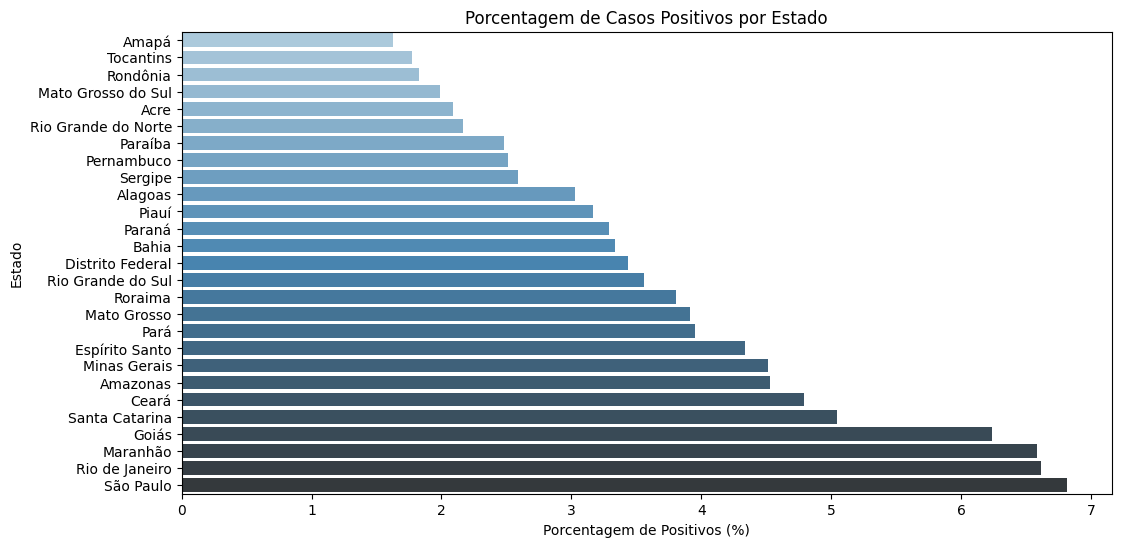

In [ ]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os casos positivos
df_unido_positivos = df_unido.filter(
    (F.col("positivo_swab") == 1) |
    (F.col("positivo_furo") == 1) |
    (F.col("positivo_braco") == 1)
)

# Dados dos estados com id_uf e nome do estado
dados_estados = [
    (11, "Rondônia"), (12, "Acre"), (13, "Amazonas"), (14, "Roraima"), (15, "Pará"),
    (16, "Amapá"), (17, "Tocantins"), (21, "Maranhão"), (22, "Piauí"), (23, "Ceará"),
    (24, "Rio Grande do Norte"), (25, "Paraíba"), (26, "Pernambuco"), (27, "Alagoas"),
    (28, "Sergipe"), (29, "Bahia"), (31, "Minas Gerais"), (32, "Espírito Santo"),
    (33, "Rio de Janeiro"), (35, "São Paulo"), (41, "Paraná"), (42, "Santa Catarina"),
    (43, "Rio Grande do Sul"), (50, "Mato Grosso do Sul"), (51, "Mato Grosso"),
    (52, "Goiás"), (53, "Distrito Federal")
]

# Criar um DataFrame a partir dos dados dos estados
schema_estados = ["id_uf", "nome_estado"]
df_estados = spark.createDataFrame(dados_estados, schema=schema_estados)

# Juntar o DataFrame df_unido_positivos com o DataFrame df_estados para adicionar os nomes dos estados
df_unido_positivos_estados = df_unido_positivos.join(df_estados, on="id_uf", how="left")

# Agrupar pelo nome do estado (nome_estado) e contar o número de positivos em cada estado
df_total_positivos_estado = df_unido_positivos_estados.groupBy("nome_estado").count()

# Converter o DataFrame do PySpark para Pandas
df_total_positivos_estado_pd = df_total_positivos_estado.toPandas()

# Calcular a porcentagem de casos positivos em cada estado
total_positivos = df_total_positivos_estado_pd["count"].sum()
df_total_positivos_estado_pd["percent"] = (df_total_positivos_estado_pd["count"] / total_positivos) * 100

# Ordenar os dados em ordem crescente
df_total_positivos_estado_pd = df_total_positivos_estado_pd.sort_values(by="percent", ascending=True)

# Criar o gráfico de barras com cores ascendentes
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x="percent", y="nome_estado", data=df_total_positivos_estado_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Porcentagem de Casos Positivos por Estado")
plt.xlabel("Porcentagem de Positivos (%)")
plt.ylabel("Estado")

# Exibir o gráfico
plt.show()


<ipython-input-165-d3da9cd8fdc1>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="descricao_sexo", y="count", data=df_total_positivos_sexo_pd, palette="Blues_d")


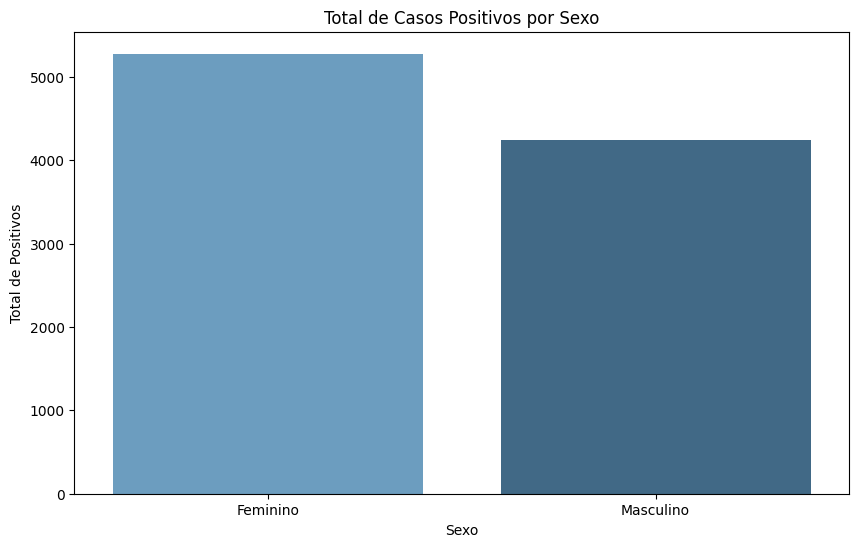

In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Filtrar os casos positivos por sexo e adicionar descrição dos tipos de área
df_unido_positivos_area = df.filter(
    ((F.col("positivo_swab") == 1) |
     (F.col("positivo_furo") == 1) |
     (F.col("positivo_braco") == 1)) &
    (F.col("tipo_area").isNotNull())
).withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
)

# Contar o número de casos positivos por sexo
df_total_positivos_sexo = df_unido_positivos_area.groupBy("descricao_sexo").count()

# Converter o DataFrame do PySpark para Pandas
df_total_positivos_sexo_pd = df_total_positivos_sexo.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="descricao_sexo", y="count", data=df_total_positivos_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Casos Positivos por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Total de Positivos")

# Exibir o gráfico
plt.show()



<ipython-input-161-5eeb508b9342>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="descricao_sexo", y="count", data=df_total_positivos_sexo_pd, palette="Blues_d")


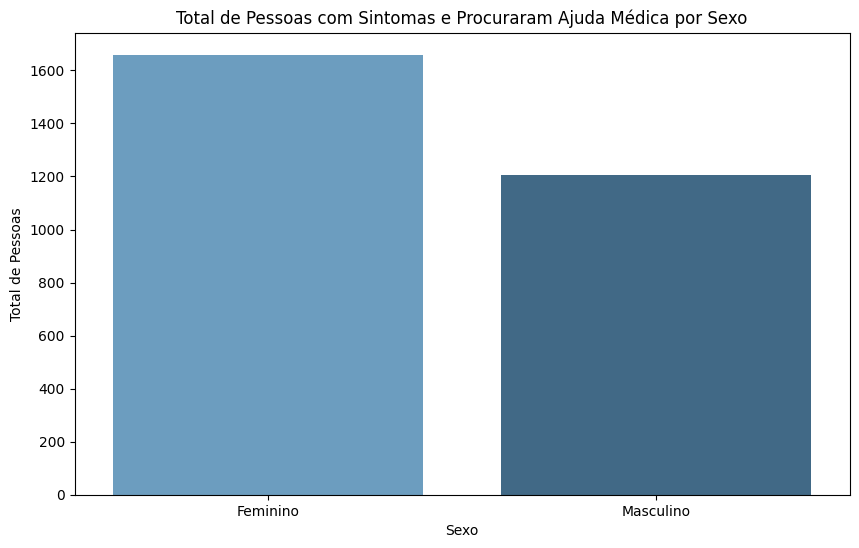

In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Adicionar descrições para sexo
df_sintomas_unidade_saude = df_sintomas_unidade_saude.withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
)

# Contar o número de casos positivos por sexo
df_total_positivos_sexo = df_sintomas_unidade_saude.groupBy("descricao_sexo").count()

# Converter o DataFrame do PySpark para Pandas
df_total_positivos_sexo_pd = df_total_positivos_sexo.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="descricao_sexo", y="count", data=df_total_positivos_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Pessoas com Sintomas e Procuraram Ajuda Médica por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Total de Pessoas")

# Exibir o gráfico
plt.show()


<ipython-input-163-457e46070806>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="descricao_sexo", y="percentual", data=df_total_sintomas_sexo_pd, palette="Blues_d")


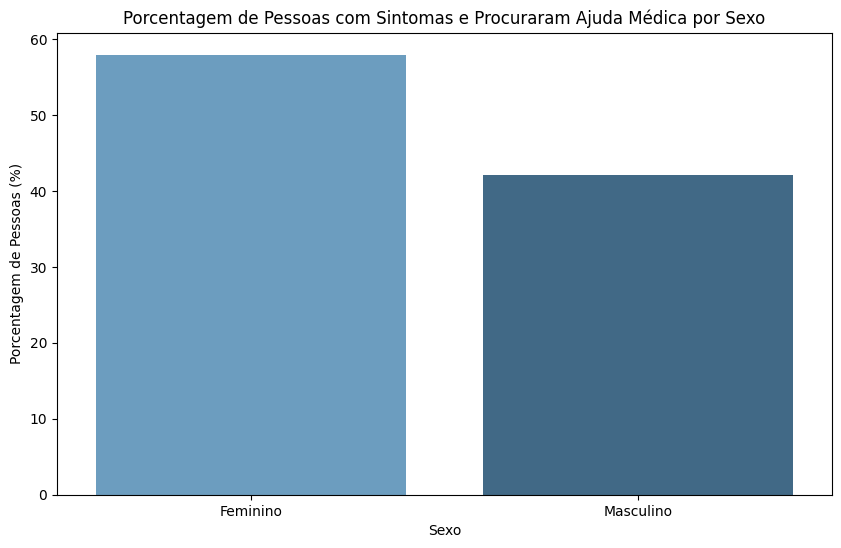

In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Filtrar os dados para obter apenas aqueles que tiveram pelo menos um dos sintomas mencionados e procuraram unidade de saúde
df_sintomas_unidade_saude = df.filter(
    ((F.col("teve_garganta") == 1) |
     (F.col("teve_dif_respirar") == 1) |
     (F.col("teve_perda_olfato_paladar") == 1) |
     (F.col("teve_tosse") == 1)) &
    (F.col("procurou_Unidade_saude") == 1)
)

# Adicionar descrições para sexo
df_sintomas_unidade_saude = df_sintomas_unidade_saude.withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
)

# Contar o número de casos por sexo
df_total_sintomas_sexo = df_sintomas_unidade_saude.groupBy("descricao_sexo").count()

# Calcular o total de pessoas
total_pessoas = df_total_sintomas_sexo.agg(F.sum("count")).collect()[0][0]

# Calcular a porcentagem de casos por sexo
df_total_sintomas_sexo = df_total_sintomas_sexo.withColumn(
    "percentual",
    (F.col("count") / total_pessoas) * 100
)

# Converter o DataFrame do PySpark para Pandas
df_total_sintomas_sexo_pd = df_total_sintomas_sexo.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="descricao_sexo", y="percentual", data=df_total_sintomas_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Porcentagem de Pessoas com Sintomas e Procuraram Ajuda Médica por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Porcentagem de Pessoas (%)")

# Exibir o gráfico
plt.show()


In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Adicionar descrições para sexo
df = df.withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
    F.when(F.col("medida_contato") == 1"Masculino")
    .when(F.col("medida_contato") == 2, "Feminino")
    .when(F.col("medida_contato") == 3, "Feminino")
    .when(F.col("medida_contato") == 4, "Feminino")
    .when(F.col("medida_contato") == 9, "Ignorado")
    .otherwise("Outro")
)

# Filtrar os dados por tipo de medida de proteção (medida_contato)
df_protecao_sexo = df.select("descricao_sexo", "medida_contato")

# Contar o número de pessoas por sexo e tipo de medida de proteção
df_total_protecao_sexo = df_protecao_sexo.groupBy("descricao_sexo", "medida_contato").count()

# Converter o DataFrame do PySpark para Pandas
df_total_protecao_sexo_pd = df_total_protecao_sexo.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="medida_contato", y="count", hue="descricao_sexo", data=df_total_protecao_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Medidas de Proteção por Sexo")
plt.xlabel("Tipo de Medida de Proteção")
plt.ylabel("Total de Pessoas")

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-168-b9707666467c>, line 46)

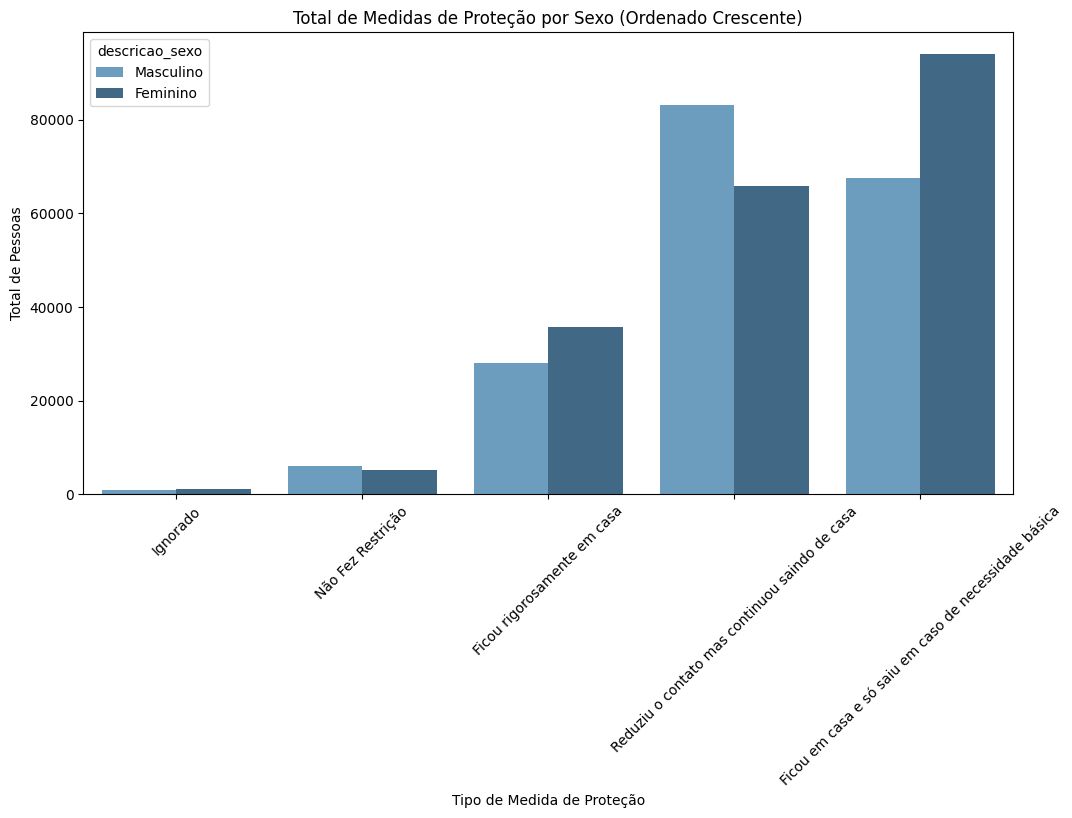

In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Adicionar descrições para sexo e tipo de medida de proteção
df = df.withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
).withColumn(
    "descricao_medida",
    F.when(F.col("medida_contato") == 1, "Não Fez Restrição")
    .when(F.col("medida_contato") == 2, "Reduziu o contato mas continuou saindo de casa")
    .when(F.col("medida_contato") == 3, "Ficou em casa e só saiu em caso de necessidade básica")
    .when(F.col("medida_contato") == 4, "Ficou rigorosamente em casa")
    .when(F.col("medida_contato") == 9, "Ignorado")
    .otherwise("Outro")
)

# Filtrar os dados por tipo de medida de proteção (descricao_medida)
df_protecao_sexo = df.select("descricao_sexo", "descricao_medida")

# Contar o número de pessoas por sexo e tipo de medida de proteção
df_total_protecao_sexo = df_protecao_sexo.groupBy("descricao_sexo", "descricao_medida").count()

# Converter o DataFrame do PySpark para Pandas
df_total_protecao_sexo_pd = df_total_protecao_sexo.toPandas()

# Ordenar os dados em ordem crescente pelo número de pessoas
df_total_protecao_sexo_pd = df_total_protecao_sexo_pd.sort_values(by="count", ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="descricao_medida", y="count", hue="descricao_sexo", data=df_total_protecao_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Total de Medidas de Proteção por Sexo (Ordenado Crescente)")
plt.xlabel("Tipo de Medida de Proteção")
plt.ylabel("Total de Pessoas")

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


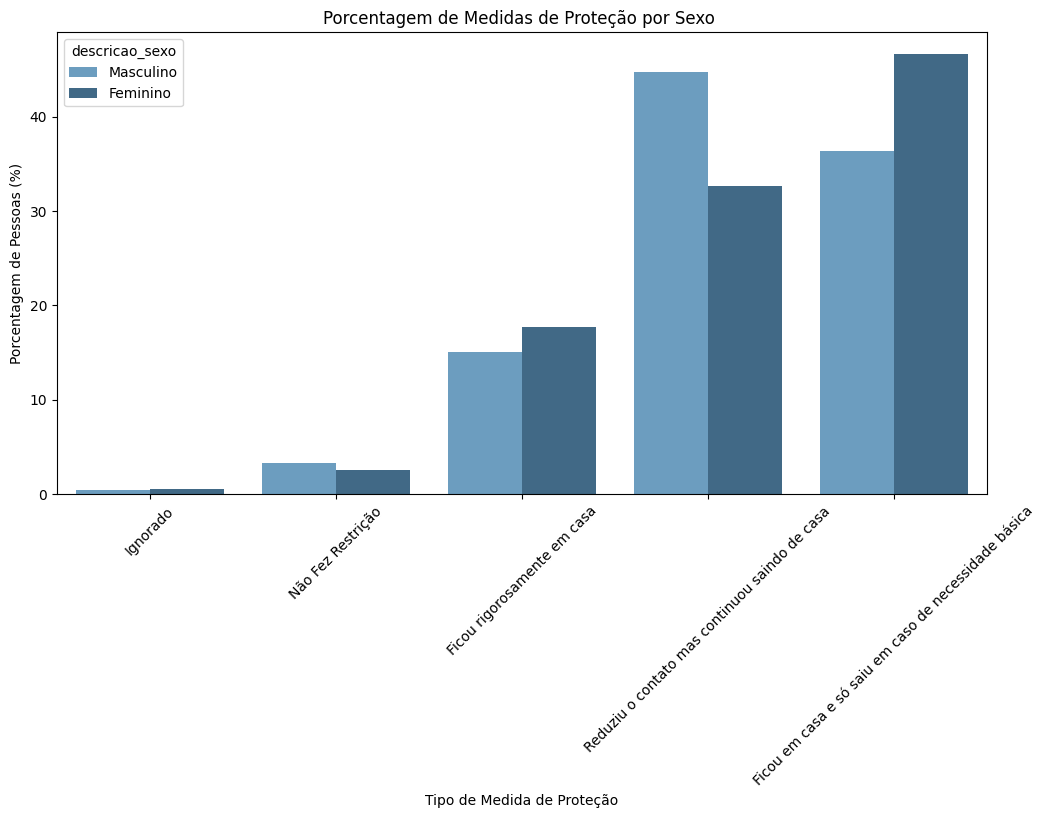

In [ ]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iniciar uma sessão Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Carregar os dados
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/content/PNAD_COVID_092020.csv")

# Renomear as colunas do DataFrame
def renomear_colunas(df):
    df = df.withColumnRenamed("V1013", "nr_mes") \
        .withColumnRenamed("B0011", "teve_febre") \
        .withColumnRenamed("B0012", "teve_tosse") \
        .withColumnRenamed("B0013", "teve_garganta") \
        .withColumnRenamed("B0014", "teve_dif_respirar") \
        .withColumnRenamed("B00111", "teve_perda_olfato_paladar") \
        .withColumnRenamed("B011", "medida_contato") \
        .withColumnRenamed("B005", "ficou_internado") \
        .withColumnRenamed("A002", "nr_idade") \
        .withColumnRenamed("A003", "nm_sexo") \
        .withColumnRenamed("A004", "nm_raca") \
        .withColumnRenamed("B002", "procurou_Unidade_saude") \
        .withColumnRenamed("B008", "fez_teste_covid") \
        .withColumnRenamed("V1023", "tipo_area") \
        .withColumnRenamed("F002A5", "itens_higiene") \
        .withColumnRenamed("D0051", "recebeu_auxilio_emergencial") \
        .withColumnRenamed("E001", "solicitou_emprestimo") \
        .withColumnRenamed("A005", "nm_escolaridade") \
        .withColumnRenamed("C007C", "ocupacao_princial") \
        .withColumnRenamed("C007", "esta_empregado") \
        .withColumnRenamed("UF", "id_uf") \
        .withColumnRenamed("B009B", "positivo_swab") \
        .withColumnRenamed("B009D", "positivo_furo") \
        .withColumnRenamed("B009F", "positivo_braco")
    return df

# Aplicar a renomeação das colunas
df = renomear_colunas(df)

# Adicionar descrições para sexo e tipo de medida de proteção
df = df.withColumn(
    "descricao_sexo",
    F.when(F.col("nm_sexo") == 1, "Masculino")
    .when(F.col("nm_sexo") == 2, "Feminino")
    .otherwise("Outro")
).withColumn(
    "descricao_medida",
    F.when(F.col("medida_contato") == 1, "Não Fez Restrição")
    .when(F.col("medida_contato") == 2, "Reduziu o contato mas continuou saindo de casa")
    .when(F.col("medida_contato") == 3, "Ficou em casa e só saiu em caso de necessidade básica")
    .when(F.col("medida_contato") == 4, "Ficou rigorosamente em casa")
    .when(F.col("medida_contato") == 9, "Ignorado")
    .otherwise("Outro")
)

# Filtrar os dados por tipo de medida de proteção (descricao_medida)
df_protecao_sexo = df.select("descricao_sexo", "descricao_medida")

# Contar o número de pessoas por sexo e tipo de medida de proteção
df_total_protecao_sexo = df_protecao_sexo.groupBy("descricao_sexo", "descricao_medida").count()

# Calcular o total de pessoas para cada sexo
total_pessoas_sexo = df_total_protecao_sexo.groupBy("descricao_sexo").agg(F.sum("count").alias("total"))

# Juntar os totais de pessoas com os dados de medidas de proteção
df_total_protecao_sexo = df_total_protecao_sexo.join(total_pessoas_sexo, on="descricao_sexo")

# Calcular a porcentagem de medidas de proteção por sexo
df_total_protecao_sexo = df_total_protecao_sexo.withColumn(
    "percentual",
    (F.col("count") / F.col("total")) * 100
)

# Converter o DataFrame do PySpark para Pandas
df_total_protecao_sexo_pd = df_total_protecao_sexo.toPandas()

# Ordenar os dados em ordem crescente pelo percentual
df_total_protecao_sexo_pd = df_total_protecao_sexo_pd.sort_values(by="percentual", ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="descricao_medida", y="percentual", hue="descricao_sexo", data=df_total_protecao_sexo_pd, palette="Blues_d")

# Adicionar título e rótulos aos eixos
plt.title("Porcentagem de Medidas de Proteção por Sexo ")
plt.xlabel("Tipo de Medida de Proteção")
plt.ylabel("Porcentagem de Pessoas (%)")

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

